#Vehicle silhouettes

##Objective
To classify a given silhouette as one of four types of vehicle, 	using a set of features extracted from the silhouette. The 	vehicle may be viewed from one of many different angles.   

##Description

###The features were extracted from the silhouettes by the HIPS
(Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising	both classical moments based measures such as scaled variance,	skewness and kurtosis about the major/minor axes and heuristic	measures such as hollows, circularity, rectangularity and	compactness. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400.	This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
	
##Source: https://www.kaggle.com/rajansharma780/vehicle

## ATTRIBUTES
1.	compactness	float	average perimeter**2/area
2.	circularity	float	average radius**2/area
3.	distance_circularity	float	area/(av.distance from border)**2
4.	radius_ratio	float	(max.rad-min.rad)/av.radius
5.	pr_axis_aspect_ratio	float	(minor axis)/(major axis)
6.	max_length_aspect_ratio	float	(length perp. max length)/(max length)
7.	scatter_ratio	float	(inertia about minor axis)/(inertia about major axis)
8.	elongatedness	float	area/(shrink width)**2
9.	pr_axis_rectangularity	float	area/(pr.axis length*pr.axis width)
10.	max_length_rectangularity	float	area/(max.length*length perp. to this)
11.	scaled_variance_major_axis	float	(2nd order moment about minor axis)/area
12.	scaled_variance_minor_axis	float	(2nd order moment about major axis)/area
13.	scaled_radius_gyration	float	(mavar+mivar)/area
14.	skewness_major_axis	float	(3rd order moment about major axis)/sigma_min**3
15.	skewness_minor_axis	float	(3rd order moment about minor axis)/sigma_maj**3
16.	kurtosis_minor_axis	float	(4th order moment about major axis)/sigma_min**4
17.	kurtosis_major_axis	float	(4th order moment about minor axis)/sigma_maj**4
18.	hollows_ratio	float	(area of hollows)/(area of bounding polygon)

##Target variable
19.	vehicle_class	string	Predictor Class. Values: Opel, Saab, Bus, Van	

#Tasks:
1.	Obtain the multi-class dataset from the given link
2.	Load the dataset
3.	Apply pre-processing techniques: Encoding, Scaling
4.	Divide the dataset into training (70%) and testing (30%)
5.	Build your own random forest model from scratch (using invidual decision tree model from sklearn)
6.	Train the random forest model
7.	Test the random forest model
8.	Train and test the random forest model using sklearn.
9.	Compare the performance of both the models

##Useful links:
https://machinelearningmastery.com/implement-random-forest-scratch-python/

https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

https://www.analyticsvidhya.com/blog/2018/12/building-a-random-forest-from-scratch-understanding-real-world-data-products-ml-for-programmers-part-3/

# Part 1: Random Forest from scratch

Random forests are an ensemble learning method for classification and regression that operate by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [1]:
# Load the libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing
import pandas as pd
import scipy.stats
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
# Load the dataset 
data=pd.read_csv("vehicle.csv")
data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [4]:
#Check null values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['class']
data[cols[0:]] = data[cols[0:]].apply(lambda col: le.fit_transform(col))


In [6]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
from sklearn.preprocessing import MinMaxScaler
columns = data.columns
mms = MinMaxScaler()
data[columns[:-1]] = mms.fit_transform(data[columns[:-1]])


In [7]:
data = data.fillna(0)

In [8]:
#checking if still there is a missing value
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [10]:
# Divide the dataset to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=0)


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(592, 18)
(254, 18)
(592,)
(254,)


In [12]:
# Randomly choose the features from training set and build decision tree
# Randomness in the features will help us to achieve different DTrees every time
# You can keep minimum number of random features every time so that trees will have sufficient features
# Note: You can use builtin function for DT training using Sklearn

import random
def random_features(X_train, l):
  orig_features = list(X_train.columns)
  random_features = random.sample(orig_features,k=l)
  
  return random_features

In [14]:
# Train N number of decision trees using random feature selection strategy
# Number of trees N can be user input
n = int(input("Enter the number of trees"))
len = int(input("Enter the minimum features you want"))
trees = []
feature = []
for i in range(n):
  features = random_features(X_train,len+i)
  feature.append(features)
  clf = DecisionTreeClassifier()
  clf.fit(X_train[features].values.astype('float'), y_train.values.astype('float'))
  trees.append(clf)



Enter the number of trees5
Enter the minimum features you want8


In [15]:
feature

[['distance_circularity',
  'scaled_variance',
  'scaled_variance.1',
  'scaled_radius_of_gyration.1',
  'skewness_about',
  'scatter_ratio',
  'circularity',
  'compactness'],
 ['max.length_aspect_ratio',
  'skewness_about.1',
  'scaled_variance.1',
  'pr.axis_rectangularity',
  'distance_circularity',
  'max.length_rectangularity',
  'skewness_about.2',
  'scaled_radius_of_gyration.1',
  'radius_ratio'],
 ['pr.axis_aspect_ratio',
  'scaled_variance.1',
  'compactness',
  'scaled_radius_of_gyration.1',
  'scatter_ratio',
  'scaled_radius_of_gyration',
  'hollows_ratio',
  'scaled_variance',
  'radius_ratio',
  'skewness_about.1'],
 ['pr.axis_aspect_ratio',
  'scatter_ratio',
  'skewness_about.1',
  'skewness_about.2',
  'elongatedness',
  'max.length_rectangularity',
  'max.length_aspect_ratio',
  'scaled_radius_of_gyration',
  'circularity',
  'scaled_variance.1',
  'radius_ratio'],
 ['elongatedness',
  'hollows_ratio',
  'scaled_radius_of_gyration.1',
  'skewness_about.2',
  'max.le

In [16]:
# Apply different voting mechanisms such as 
# max voting/average voting/weighted average voting (using accuracy as weightage)
# Perform the ensembling for the training set.
from sklearn.metrics import precision_recall_fscore_support

In [17]:
# Apply invidual trees trained on the testingset
# Note: You should've saved the feature sets used for training invidual trees,
# so that same features can be chosen in testing set

# Get predictions on testing set
accu = []
prec = []
rec = []
fs = []
i=0
for clf in trees:
  features = feature[i]
  i+=1
  predictions = clf.predict(X_test[features].values)
  
  y_pred= []
  for row_number in range(predictions.shape[0]):
      y_pred.append(np.mean(predictions[row_number, ]))
  y_pred = np.array(y_pred)
  acc = clf.score(X_test[features].values,y_test.values)
  # arr = y_pred - y_test.values
  # accuracy = np.count_nonzero(arr==0)/(y_pred.shape[0])
  accu.append(acc)
  precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred,beta=1.0)
  prec.append(np.mean(precision))
  rec.append(np.mean(recall))
  fs.append(np.mean(fscore))

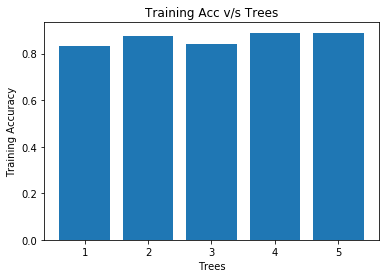

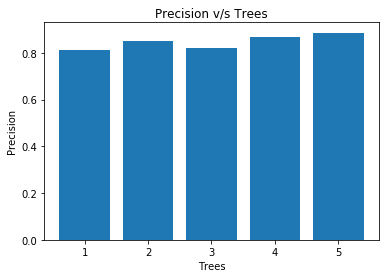

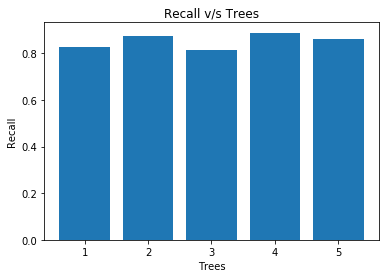

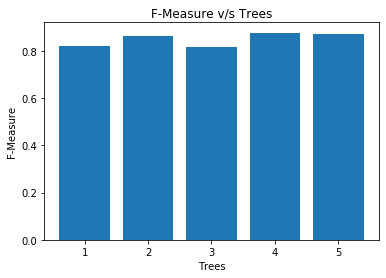

In [18]:
# Evaluate the results using accuracy, precision, recall and f-measure
import matplotlib.pyplot as plt 
ntre = []
for i in range(n):
  ntre.append(i+1)
plt.xlabel("Trees") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Trees") 
# creating the bar plot 
plt.bar(ntre, accu) 

plt.show() 

plt.bar(ntre, prec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Precision") 
plt.title("Precision v/s Trees") 
plt.show() 

plt.bar(ntre, rec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Recall") 
plt.title("Recall v/s Trees") 
plt.show() 

plt.bar(ntre, fs ) 
  
plt.xlabel("Trees") 
plt.ylabel("F-Measure") 
plt.title("F-Measure v/s Trees") 
plt.show() 


In [19]:
accu = []
prec = []
rec = []
fs = []
i=0
for clf in trees:
  features = feature[i]
  i+=1
  predictions = clf.predict(X_test[features].values)
  
  y_pred= []
  weights = clf.score(X_test[features].values,predictions)
  for row_number in range(predictions.shape[0]):
      y_pred.append(np.mean(predictions[row_number, ]*weights))
  y_pred = np.array(y_pred)
  acc = clf.score(X_test[features].values,y_test.values)
  # arr = y_pred - y_test.values
  # accuracy = np.count_nonzero(arr==0)/(y_pred.shape[0])
  accu.append(acc)
  precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred,beta=1.0)
  prec.append(np.mean(precision))
  rec.append(np.mean(recall))
  fs.append(np.mean(fscore))

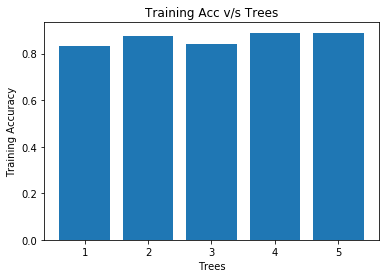

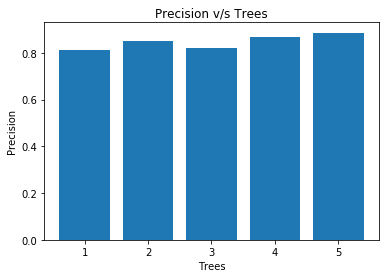

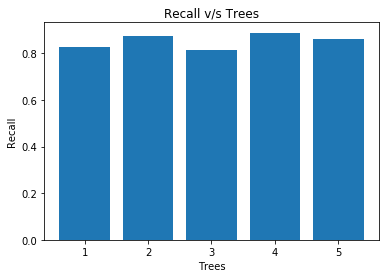

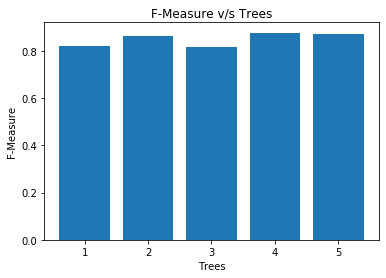

In [20]:
##For weighted Averaging

# Evaluate the results using accuracy, precision, recall and f-measure
import matplotlib.pyplot as plt 
ntre = []
for i in range(n):
  ntre.append(i+1)
plt.xlabel("Trees") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Trees") 
# creating the bar plot 
plt.bar(ntre, accu) 

plt.show() 

plt.bar(ntre, prec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Precision") 
plt.title("Precision v/s Trees") 
plt.show() 

plt.bar(ntre, rec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Recall") 
plt.title("Recall v/s Trees") 
plt.show() 

plt.bar(ntre, fs ) 
  
plt.xlabel("Trees") 
plt.ylabel("F-Measure") 
plt.title("F-Measure v/s Trees") 
plt.show() 


## Part 2: Random Forest using Sklearn

In [22]:
# Use the preprocessed dataset here

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# Divide the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=0)

In [23]:
# Train the Random Forest Model using builtin Sklearn Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(1000,max_depth=2, random_state=0)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
# Test the model with testing set and print the accuracy, precision, recall and f-measure
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)
print(acc)


0.7874015748031497


In [25]:
# Play with parameters such as
# number of decision trees
# Criterion for splitting
# Max depth
# Minimum samples per split and leaf
clf = RandomForestClassifier(100,max_depth=5, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)
print(acc)

0.9251968503937008


In [27]:
clf = RandomForestClassifier(1000,max_depth=5, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)
print(acc)

0.9330708661417323


 Kept the max depth same and increase the forest size and here results are good i am gettng more accuracy.